# 범죄데이터 분석

## 개요
- 범죄에 대한 공공데이터 분석과 통계
- 범죄상황에 따른 빈도수와 범죄유형에 따른 빈도수 파악 등

### 데이터셋
- 공공데이터 포털 데이터 활용
    - 대검찰청 범죄 발생지 (https://www.data.go.kr/data/15085726/fileData.do)
    - 대검찰청 범죄 발생지 현황 (https://www.data.go.kr/data/2894825/fileData.do) 
    - 대검찰청 범죄발생 장소 현황 (https://www.data.go.kr/data/2838944/fileData.do)
    - 대검찰청 범죄 발생 요일 (https://www.data.go.kr/data/2950729/fileData.do)
    - 대검찰청 범조발생 시간 (https://www.data.go.kr/data/2838943/fileData.do)
    - 경찰철 범죄 발생 시간대 및 요일 (https://www.data.go.kr/data/3074459/fileData.do)
    - 경찰청_범죄자 생활정도, 혼인관계 및 부모관계(https://www.data.go.kr/data/3074470/fileData.do)
    - 경찰청 5대범죄 발생건수 (https://www.data.go.kr/data/15083810/fileData.do)
    - 서울특별시_자치구 년도별 CCTV 설치 현황 (http://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do)

#### 문제점
- 현재 데이터의 취합년도의 경우 검찰청, 경찰철 공식사이트에서도 데이터가 년도의 범위가 차이가 많이 남

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import folium

In [2]:
## 한글 깨짐현상
import matplotlib
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothic.ttf' 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 한글깨짐현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글 사용시 마이너스 깨짐현상 해결

In [3]:
## 범죄요일 확인
df_crimedays = pd.read_csv('../Datas/2009년 범죄발생 요일 현황.csv', engine='python', encoding='UTF-8', skipfooter=5)
df_crimedays.drop(['Unnamed: 9'], axis=1, inplace=True)
df_crimedays.tail()

,범죄분류,일,월,화,수,목,금,토,미상
18,실화,267,262,254,251,292,278,284,1
19,주거침입,801,857,809,896,834,764,822,46
20,유기,20,19,15,19,15,16,13,-
21,교통사고처리특례법위반,24295,27926,28496,28690,28674,30805,30825,105
22,도로교통법위반,5814,5165,5478,5566,5701,6072,6519,46


In [4]:
## 인덱스를 범죄분류로 변경
df_crimedays.set_index(keys=df_crimedays[' 범죄분류 '], inplace=True)
df_crimedays

,범죄분류,일,월,화,수,목,금,토,미상
범죄분류,,,,,,,,,
절도,절도,33333,36789,35410,38103,36553,38617,37517,358
장물,장물,279,403,441,882,466,447,442,21
손괴,손괴,6438,5570,5899,5795,5869,6386,6908,86
살인,살인,209,203,183,204,194,203,178,16
강도,강도,944,853,894,904,946,934,877,27
방화,방화,262,244,289,262,289,261,252,7
강간,강간,2395,2145,2231,2286,2281,2317,2381,120
폭행,폭행,17129,14507,16368,15834,16129,16733,18495,329
상해,상해,11865,10497,11820,11562,11876,11950,12688,428


In [5]:
## 인덱스열 삭제
df_crimedays.drop([' 범죄분류 '], inplace=True, axis=1)
df_crimedays.head()

,일,월,화,수,목,금,토,미상
범죄분류,,,,,,,,
절도,33333,36789,35410,38103,36553,38617,37517,358
장물,279,403,441,882,466,447,442,21
손괴,6438,5570,5899,5795,5869,6386,6908,86
살인,209,203,183,204,194,203,178,16
강도,944,853,894,904,946,934,877,27


In [6]:
## CSV 컬럼헤더의 공백 삭제
df_crimedays.rename(columns={' 일 ':'일',
                             ' 월 ':'월', 
                             ' 화 ':'화',
                             ' 수 ':'수',
                             ' 목 ':'목',
                             ' 금 ':'금',
                             ' 토 ':'토',
                             ' 미상 ':'미상'}, inplace=True)
df_crimedays.head()

,일,월,화,수,목,금,토,미상
범죄분류,,,,,,,,
절도,33333,36789,35410,38103,36553,38617,37517,358
장물,279,403,441,882,466,447,442,21
손괴,6438,5570,5899,5795,5869,6386,6908,86
살인,209,203,183,204,194,203,178,16
강도,944,853,894,904,946,934,877,27


##### 데이터 처리시

<img src="https://raw.githubusercontent.com/hugoMGSung/bigdata-analysis-2023/main/Images/bigdata002.jpg" width="600" alt="데이터 문제">

위와 같은 문제가 발생시는 csv 파일 자체를 수정하는 것이 더 빠름!

In [7]:
df_crimedays = pd.read_csv('../Datas/2009년 범죄발생 요일 현황 copy.csv', engine='python', encoding='UTF-8', skipfooter=5)
df_crimedays.drop(['Unnamed: 9'], axis=1, inplace=True)
df_crimedays.tail()

,범죄분류,일,월,화,수,목,금,토,미상
18,실화,267,262,254,251,292,278,284,1
19,주거침입,801,857,809,896,834,764,822,46
20,유기,20,19,15,19,15,16,13,-
21,교통사고처리특례법위반,24295,27926,28496,28690,28674,30805,30825,105
22,도로교통법위반,5814,5165,5478,5566,5701,6072,6519,46


In [8]:
df_crimedays.dtypes

범죄분류    object
일        int64
월        int64
화        int64
수        int64
목        int64
금        int64
토        int64
미상      object
dtype: object

In [9]:
df_crimedays_summary = df_crimedays.sum()
df_crimedays_summary = pd.DataFrame(df_crimedays_summary)
df_crimedays_summary

,0
범죄분류,절도장물손괴살인강도방화강간폭행상해협박공갈약취와유인체포와감금폭력행위등처벌에관한법률위반...
일,119772
월,120748
화,123870
수,126287
목,125565
금,131461
토,134122
미상,3582186162771203294286612662424222100718146-10546


#### 

##### 위와 같이 그냥 합치면 안됨
1. 범죄분류를 인덱스로
2. 미상 Object 이므로 -를 0으로 전처리

In [10]:
df_crimedays.set_index(keys=df_crimedays['범죄분류'], inplace=True)
df_crimedays

,범죄분류,일,월,화,수,목,금,토,미상
범죄분류,,,,,,,,,
절도,절도,33333,36789,35410,38103,36553,38617,37517,358
장물,장물,279,403,441,882,466,447,442,21
손괴,손괴,6438,5570,5899,5795,5869,6386,6908,86
살인,살인,209,203,183,204,194,203,178,16
강도,강도,944,853,894,904,946,934,877,27
방화,방화,262,244,289,262,289,261,252,7
강간,강간,2395,2145,2231,2286,2281,2317,2381,120
폭행,폭행,17129,14507,16368,15834,16129,16733,18495,329
상해,상해,11865,10497,11820,11562,11876,11950,12688,428


In [11]:
df_crimedays.drop('범죄분류', axis=1, inplace=True)
df_crimedays

,일,월,화,수,목,금,토,미상
범죄분류,,,,,,,,
절도,33333,36789,35410,38103,36553,38617,37517,358
장물,279,403,441,882,466,447,442,21
손괴,6438,5570,5899,5795,5869,6386,6908,86
살인,209,203,183,204,194,203,178,16
강도,944,853,894,904,946,934,877,27
방화,262,244,289,262,289,261,252,7
강간,2395,2145,2231,2286,2281,2317,2381,120
폭행,17129,14507,16368,15834,16129,16733,18495,329
상해,11865,10497,11820,11562,11876,11950,12688,428


In [12]:
df_crimedays['미상'].replace('-', 0, inplace=True)

In [13]:
## 미상 컬럼을 int64로
df_crimedays['미상'] = df_crimedays['미상'].astype('int64')

In [14]:
df_crimedays.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 절도 to 도로교통법위반
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   일       23 non-null     int64
 1   월       23 non-null     int64
 2   화       23 non-null     int64
 3   수       23 non-null     int64
 4   목       23 non-null     int64
 5   금       23 non-null     int64
 6   토       23 non-null     int64
 7   미상      23 non-null     int64
dtypes: int64(8)
memory usage: 1.6+ KB


In [15]:
## 다시
df_crimedays_summary = df_crimedays.sum()
df_crimedays_summary = pd.DataFrame(df_crimedays_summary)
df_crimedays_summary

,0
일,119772
월,120748
화,123870
수,126287
목,125565
금,131461
토,134122
미상,2201


In [16]:
# 인덱스를 열로 변환
df_summary = df_crimedays_summary.reset_index()
df_summary

,index,0
0,일,119772
1,월,120748
2,화,123870
3,수,126287
4,목,125565
5,금,131461
6,토,134122
7,미상,2201


In [17]:
# 열 이름 변경하기
df_summary.rename(columns={'index':'요일'}, inplace=True)
df_summary.rename(columns={0:'합계'}, inplace=True)
df_summary

,요일,합계
0,일,119772
1,월,120748
2,화,123870
3,수,126287
4,목,125565
5,금,131461
6,토,134122
7,미상,2201


##### 시각화

In [18]:
## 한글 깨짐현상
import matplotlib
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothic.ttf' 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 한글깨짐현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글 사용시 마이너스 깨짐현상 해결

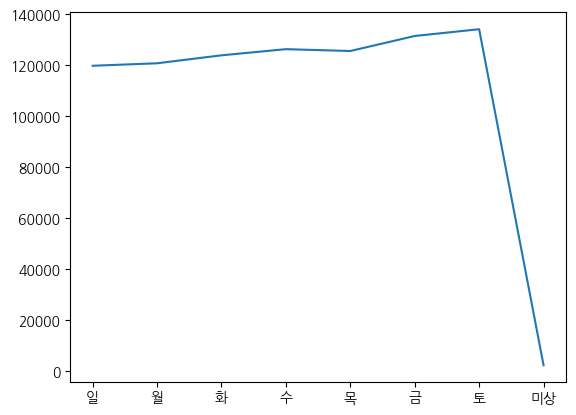

In [19]:
plt.plot(df_summary['요일'], df_summary['합계'] )
plt.show()

In [20]:
# '합계' 기준으로 내림차순 정렬
df_summary.sort_values(by='합계', ascending=False, inplace = True)

In [21]:
# sum 행 추가
df_crimedays.loc[32] = np.sum(df_crimedays, axis=0)
df_crimedays.tail()

,일,월,화,수,목,금,토,미상
범죄분류,,,,,,,,
주거침입,801,857,809,896,834,764,822,46
유기,20,19,15,19,15,16,13,0
교통사고처리특례법위반,24295,27926,28496,28690,28674,30805,30825,105
도로교통법위반,5814,5165,5478,5566,5701,6072,6519,46
32,119772,120748,123870,126287,125565,131461,134122,2201


In [22]:
# 합계 인덱스명 변경
df_crimedays.rename(index={32: '합계'}, inplace=True)
df_crimedays.tail()

,일,월,화,수,목,금,토,미상
범죄분류,,,,,,,,
주거침입,801,857,809,896,834,764,822,46
유기,20,19,15,19,15,16,13,0
교통사고처리특례법위반,24295,27926,28496,28690,28674,30805,30825,105
도로교통법위반,5814,5165,5478,5566,5701,6072,6519,46
합계,119772,120748,123870,126287,125565,131461,134122,2201


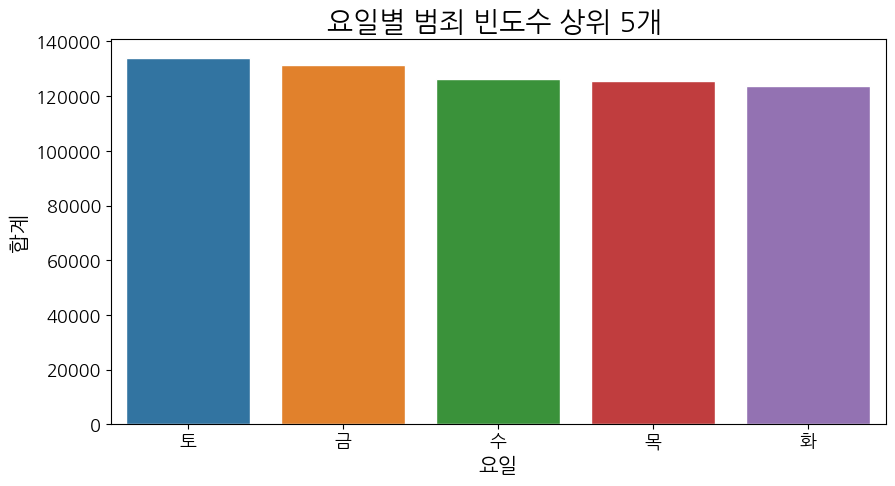

In [23]:
day = df_summary['요일'].tolist()

plt.figure(figsize = (10, 5)) # 그래프 크기 설정
plt.title('요일별 범죄 빈도수 상위 5개 ', fontsize=20)

sns.set_style('darkgrid') # 그래프 스타일 지정
sns.barplot(data=df_summary, x='요일', y ='합계', order=day[:5])

plt.ylabel('합계', fontsize = 15)
plt.xlabel('요일', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

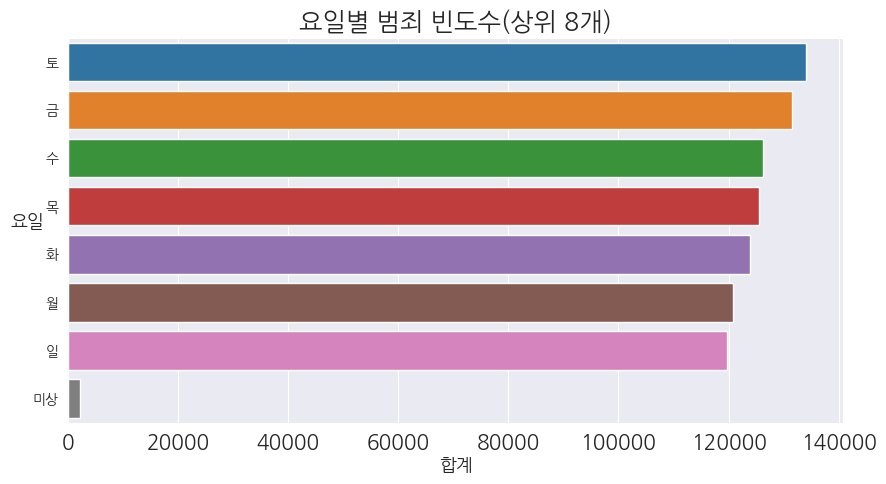

In [24]:
day = df_summary['요일'].tolist()

rc('font', family=font) # 한글깨짐현상 해결

plt.figure(figsize = (10,5))
plt.title('요일별 범죄 빈도수(상위 8개)', fontsize = 18)

sns.barplot(data=df_summary, y='요일', x='합계', order=day[:8])
sns.set_style('whitegrid') # 그래프 스타일 지정
plt.xlabel('합계', fontsize = 13) # x축 제목 서식 설정
plt.ylabel('요일', fontsize = 13, rotation=0) # y축 제목 서식 설정
plt.xticks(fontsize = 15) # x축 레이블 서식 설정
plt.yticks(fontsize = 10, rotation=0) # y축 레이블 서식 설정
plt.show()

##### 범죄시간 데이터 가져오기

![space](https://raw.githubusercontent.com/hugoMGSung/bigdata-analysis-2023/main/Images/bigdata005.jpg)

- CSV 내에 공백이 있는 타이틀이 많음

- 이를 제거하는 방법 추천

In [30]:
## 파일 읽기
f = open('../Datas/2010년 범죄발생 시간 현황.csv', mode='r', encoding='utf-8')
f2 = open('../Datas/범죄시간.csv', mode='w', encoding='utf-8')

while True:
    line = f.readline()
    if not line: break
    
    newline = line.replace(' ', '')
    print(newline)
    ##print(line)
    f2.write(newline)
    
f.close()
f2.close()

"2010년","새벽","아침","낮","오전","오후","저녁","밤","미상",

"절도","15306","13206","90967","30190","60777","27087","81473","39968",

"살인","109","57","330","115","215","127","448","191",

"강도","581","144","833","237","596","241","1665","931",

"방화","203","83","439","101","338","128","815","218",

"강간","1982","1361","3825","1166","2659","1298","6798","4675",

"폭행","8802","3695","21687","6478","15209","7983","54340","13073",

"상해","5226","2459","14861","4507","10354","5034","31066","12139",

"공갈","95","155","1835","398","1437","468","1020","1660",

"약취와유인","5","15","98","19","79","20","35","52",

"체포와감금","34","38","219","89","130","65","216","192",

"폭력행위등처벌에관한법률위반","4160","1457","9322","2402","6920","3342","21705","7415",

"도박과복표","169","127","2500","534","1966","1086","3331","6062",

"과실치사상","55","47","493","147","346","124","392","298",

"업무상과실치사상","92","194","1589","629","960","147","240","546",

"교통사고처리특례법위반","11278","17813","84237","24798","59439","25847","52378","6822",

"도로교통법위반","3193","2846",

In [31]:
## 파일 수정완료
df_time = pd.read_csv('../Datas/범죄시간.csv', encoding='utf-8')
df_time.tail()

,2010년,새벽,아침,낮,오전,오후,저녁,밤,미상,Unnamed: 9
11,도박과복표,169,127,2500,534,1966,1086,3331,6062,NaN
12,과실치사상,55,47,493,147,346,124,392,298,NaN
13,업무상과실치사상,92,194,1589,629,960,147,240,546,NaN
14,교통사고처리특례법위반,11278,17813,84237,24798,59439,25847,52378,6822,NaN
15,도로교통법위반,3193,2846,15067,4450,10617,4438,15700,2745,NaN


In [33]:
# 인덱스를 범죄분류로 변경 후 범죄분류열 삭제
df_time.set_index(keys=df_time['2010년'], inplace=True)
df_time.drop(['2010년'], inplace=True, axis=1)
df_time.head()

,새벽,아침,낮,오전,오후,저녁,밤,미상,Unnamed: 9
2010년,,,,,,,,,
절도,15306,13206,90967,30190,60777,27087,81473,39968,NaN
살인,109,57,330,115,215,127,448,191,NaN
강도,581,144,833,237,596,241,1665,931,NaN
방화,203,83,439,101,338,128,815,218,NaN
강간,1982,1361,3825,1166,2659,1298,6798,4675,NaN


In [34]:
df_time.drop('Unnamed: 9', axis=1, inplace=True)
df_time.head()

,새벽,아침,낮,오전,오후,저녁,밤,미상
2010년,,,,,,,,
절도,15306,13206,90967,30190,60777,27087,81473,39968
살인,109,57,330,115,215,127,448,191
강도,581,144,833,237,596,241,1665,931
방화,203,83,439,101,338,128,815,218
강간,1982,1361,3825,1166,2659,1298,6798,4675


In [36]:
## 합계 프레임 추가
df2 = df_time.sum()
df2 = pd.DataFrame(df2)
df2

,0
새벽,51290
아침,43697
낮,248302
오전,76260
오후,172042
저녁,77435
밤,271622
미상,96987


In [37]:
##인덱스를 열로 변환
df2 = df2.reset_index()
df2.head()

,index,0
0,새벽,51290
1,아침,43697
2,낮,248302
3,오전,76260
4,오후,172042


In [38]:
##열 이름 변경하기
df2.rename(columns={'index':'시간'},inplace=True)
df2.rename(columns={0:'합계'},inplace=True)
df2.head()

,시간,합계
0,새벽,51290
1,아침,43697
2,낮,248302
3,오전,76260
4,오후,172042


In [39]:
## '합계' 기준으로 내림차순 정렬
df2.sort_values(by='합계', ascending=False, inplace = True)
df2.head()

,시간,합계
6,밤,271622
2,낮,248302
4,오후,172042
7,미상,96987
5,저녁,77435


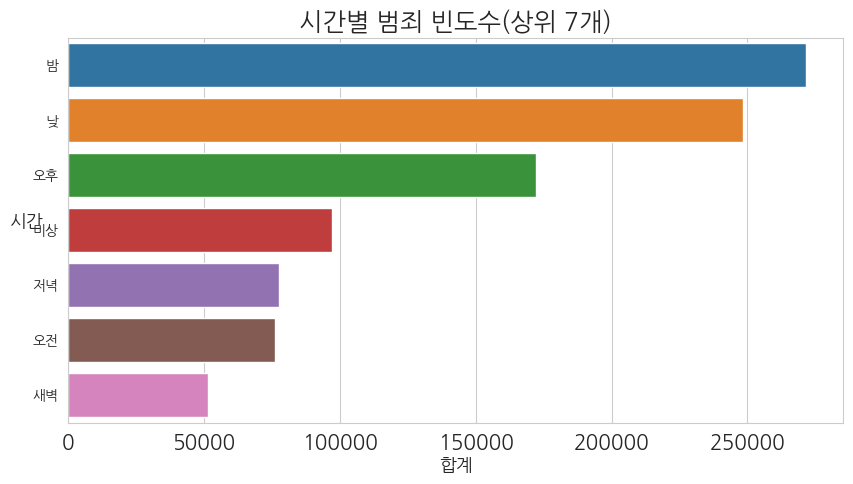

In [42]:
rc('font', family=font) # 한글깨짐현상 해결
place = df2['시간'].tolist()

plt.figure(figsize = (10,5))
plt.title('시간별 범죄 빈도수(상위 7개)', fontsize = 18)

sns.barplot(data=df2, y='시간', x='합계', order=place[:7])
sns.set_style('whitegrid') # 그래프 스타일 지정
plt.xlabel('합계', fontsize = 13) # x축 제목 서식 설정
plt.ylabel('시간', fontsize = 13, rotation=0) # y축 제목 서식 설정
plt.xticks(fontsize = 15) # x축 레이블 서식 설정
plt.yticks(fontsize = 10, rotation=0) # y축 레이블 서식 설정
plt.show()

##### 범죄분류별 분석

In [43]:
df1 = pd.read_csv('../Datas/경찰청_범죄자 생활정도, 혼인관계 및 부모관계_12_31_2020.csv', encoding='utf-8')
df1.head()
df1.tail()
df1.info()
df1.index
df1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   범죄대분류            38 non-null     object
 1   범죄중분류            38 non-null     object
 2   생활정도(계)          38 non-null     int64 
 3   생활정도(하류)         38 non-null     int64 
 4   생활정도(중류)         38 non-null     int64 
 5   생활정도(상류)         38 non-null     int64 
 6   생활정도(미상)         38 non-null     int64 
 7   혼인관계(계)          38 non-null     int64 
 8   혼인관계(소계)         38 non-null     int64 
 9   혼인관계(유배우자)       38 non-null     int64 
 10  혼인관계(동거)         38 non-null     int64 
 11  혼인관계(이혼)         38 non-null     int64 
 12  혼인관계(사별)         38 non-null     int64 
 13  미혼자부모관계(소계)      38 non-null     int64 
 14  미혼자부모관계(실(양)부모)  38 non-null     int64 
 15  미혼자부모관계(계부모)     38 non-null     int64 
 16  미혼자부모관계(실부계모)    38 non-null     int64 
 17  미혼자부모관계(실부무모)    38 non-null     int6

Index(['범죄대분류', '범죄중분류', '생활정도(계)', '생활정도(하류)', '생활정도(중류)', '생활정도(상류)',
       '생활정도(미상)', '혼인관계(계)', '혼인관계(소계)', '혼인관계(유배우자)', '혼인관계(동거)', '혼인관계(이혼)',
       '혼인관계(사별)', '미혼자부모관계(소계)', '미혼자부모관계(실(양)부모)', '미혼자부모관계(계부모)',
       '미혼자부모관계(실부계모)', '미혼자부모관계(실부무모)', '미혼자부모관계(실모계부)', '미혼자부모관계(실모무부)',
       '미혼자부모관계(계부무모)', '미혼자부모관계(계모무부)', '미혼자부모관계(무부모)', '미상'],
      dtype='object')

In [44]:
df1['범죄대분류'].unique()
df1.groupby(['범죄대분류']).count()

,범죄중분류,생활정도(계),생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(계),혼인관계(소계),혼인관계(유배우자),혼인관계(동거),...,미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
범죄대분류,,,,,,,,,,,,,,,,,,,,,
강력범죄,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
교통범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
기타범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
노동범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
마약범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
병역범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
보건범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
선거범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
안보범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [49]:
## 범죄대분류별로 그룹화
df1_group = df1.groupby('범죄대분류').sum()
df1_group

C:\Users\perso\AppData\Local\Temp\ipykernel_31712\711951182.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_group = df1.groupby('범죄대분류').sum()


,생활정도(계),생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(계),혼인관계(소계),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),...,미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
범죄대분류,,,,,,,,,,,,,,,,,,,,,
강력범죄,26971,10059,10033,404,6475,26971,9385,6396,367,2347,...,8081,25,64,535,69,1340,3,16,978,6475
교통범죄,356446,127215,92001,1725,135505,356446,140745,114965,2768,19647,...,63086,301,199,3123,224,8383,46,178,4427,135734
기타범죄,244539,90514,74578,3118,76329,244539,110901,82079,3410,21388,...,41152,272,227,2722,235,6961,35,80,5615,76339
노동범죄,613,264,209,7,133,613,369,275,12,76,...,83,0,0,8,0,12,0,0,8,133
마약범죄,11630,6628,3699,270,1033,11630,5643,3380,253,1360,...,3813,13,21,186,28,591,4,7,291,1033
병역범죄,3164,1955,911,11,287,3164,376,265,31,79,...,1762,20,20,222,24,317,3,11,122,287
보건범죄,21810,9159,8139,734,3778,21810,12964,9429,310,2586,...,3835,44,16,206,17,568,2,5,375,3778
선거범죄,1545,391,509,59,586,1545,720,618,4,69,...,183,0,0,5,1,19,0,0,26,591
안보범죄,678,338,260,3,77,678,156,101,12,39,...,352,1,1,16,3,46,0,0,26,77


In [50]:
# 범죄대분류별 합계 계산
df1_group = np.sum(df1.groupby('범죄대분류').sum(), axis=1) # axis=1 은 같은 행별로 계산하는 옵션이다.

# 인덱스 재설정
df1_group = pd.DataFrame(df1_group).reset_index()

# 컬럼명 변경
df1_group.rename(columns = {0:'total'}, inplace = True) # inplace = True: 변경 사항을 바로 적용

# 'total' 기준으로 내림차순 정렬
df1_group.sort_values(by='total', ascending=False, inplace = True)

df1_group

C:\Users\perso\AppData\Local\Temp\ipykernel_31712\2862679820.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_group = np.sum(df1.groupby('범죄대분류').sum(), axis=1) # axis=1 은 같은 행별로 계산하는 옵션이다.


,범죄대분류,total
1,교통범죄,1646496
12,폭력범죄,1463456
10,지능범죄,1392123
2,기타범죄,1146356
9,절도범죄,481869
11,특별경제범죄,319206
13,풍속범죄,169742
0,강력범죄,128380
6,보건범죄,105272
4,마약범죄,57117


In [51]:
crime_list = df1_group['범죄대분류'].tolist()
crime_list

['교통범죄',
 '폭력범죄',
 '지능범죄',
 '기타범죄',
 '절도범죄',
 '특별경제범죄',
 '풍속범죄',
 '강력범죄',
 '보건범죄',
 '마약범죄',
 '환경범죄',
 '병역범죄',
 '선거범죄',
 '안보범죄',
 '노동범죄']

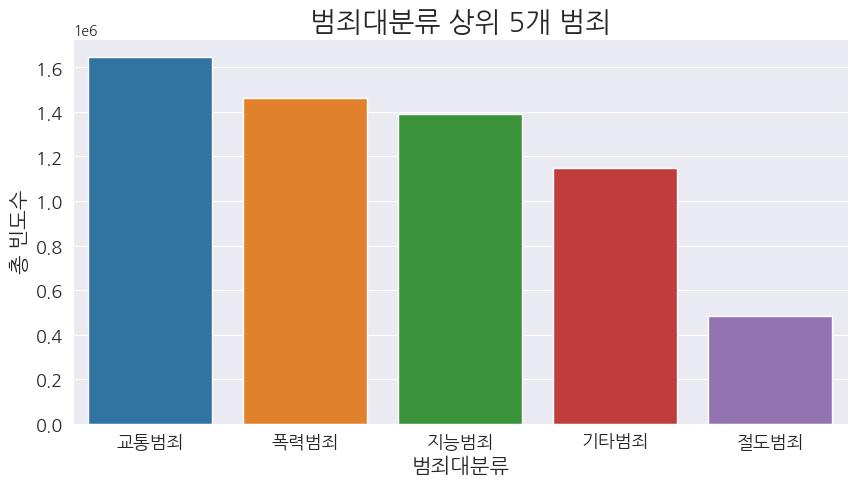

In [54]:
rc('font', family=font) # 한글깨짐현상 해결

plt.figure(figsize = (10, 5)) # 그래프 크기 설정
plt.title('범죄대분류 상위 5개 범죄', fontsize=20) # 그래프 제목 설정

sns.set_style('darkgrid') # 그래프 스타일 지정
sns.barplot(data=df1_group, x= '범죄대분류', y = 'total', order = crime_list[:5])

plt.ylabel('총 빈도수', fontsize = 15)
plt.xlabel('범죄대분류', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [55]:
# 조건 설정
cond1 = (df1['범죄대분류'] == '강력범죄')
df2 = df1.loc[cond1].drop(columns = '범죄대분류')
df2

,범죄중분류,생활정도(계),생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(계),혼인관계(소계),혼인관계(유배우자),혼인관계(동거),...,미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
0,살인기수,341,172,72,6,91,341,158,81,7,...,45,0,2,8,0,17,0,0,20,91
1,살인미수등,454,276,93,3,82,454,234,123,19,...,82,1,0,10,1,19,0,1,24,82
2,강도,1202,713,327,15,147,1202,257,144,23,...,615,2,8,37,8,69,0,3,56,147
3,강간,6113,1831,1987,78,2217,6113,1295,798,65,...,1998,8,23,143,19,270,0,2,139,2216
4,유사강간,934,331,362,7,234,934,236,145,9,...,352,1,4,21,3,55,0,1,29,232
5,강제추행,16382,5805,6798,284,3495,16382,6527,4740,206,...,4585,11,22,282,32,816,3,8,598,3498
6,기타 강간 강제추행등,349,157,126,5,61,349,99,53,5,...,143,0,3,13,1,21,0,0,8,61
7,방화,1196,774,268,6,148,1196,579,312,33,...,261,2,2,21,5,73,0,1,104,148


In [56]:
# 범죄중분류별 합계 계산
df2['합계'] = np.sum(df2, axis=1)
df2

# 합계를 기준으로 내림차순
df3 = df2[['범죄중분류','합계']].sort_values(by='합계', ascending = False)
df3

c:\DEV\LANGS\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


,범죄중분류,합계
5,강제추행,78412
3,강간,28349
2,강도,5863
7,방화,5832
4,유사강간,4438
1,살인미수등,2188
6,기타 강간 강제추행등,1684
0,살인기수,1614


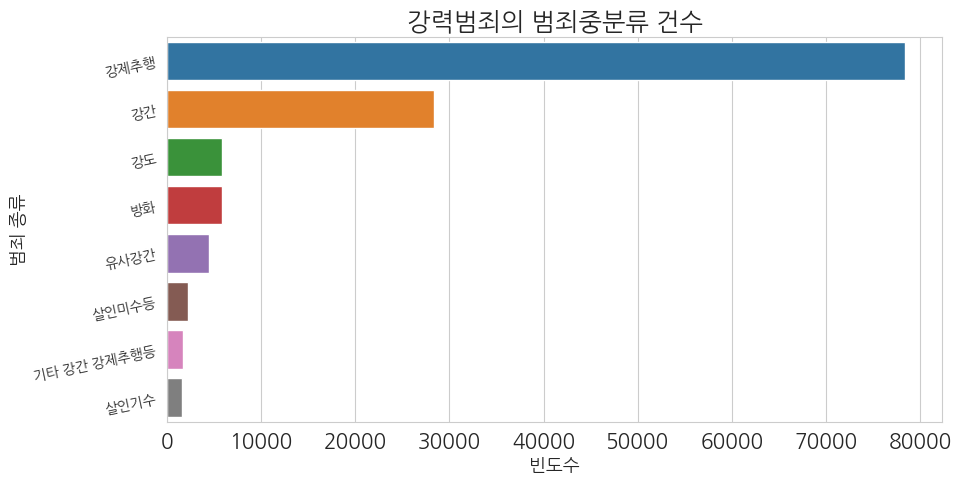

In [58]:
rc('font', family=font) # 한글깨짐현상 해결

plt.figure(figsize = (10,5))
plt.title('강력범죄의 범죄중분류 건수', fontsize = 18)

sns.barplot(data=df3, y='범죄중분류', x='합계')
sns.set_style('whitegrid') # 그래프 스타일 지정
plt.xlabel('빈도수', fontsize = 13) # x축 제목 서식 설정
plt.ylabel('범죄 종류', fontsize = 13) # y축 제목 서식 설정
plt.xticks(fontsize = 15) # x축 레이블 서식 설정
plt.yticks(fontsize = 10, rotation = 12) # y축 레이블 서식 설정
plt.show()

## 해당 그래프는 x, y가 반대이므로 x, y값 서식 설정을 반대로 생각해서 지정해야 한다.

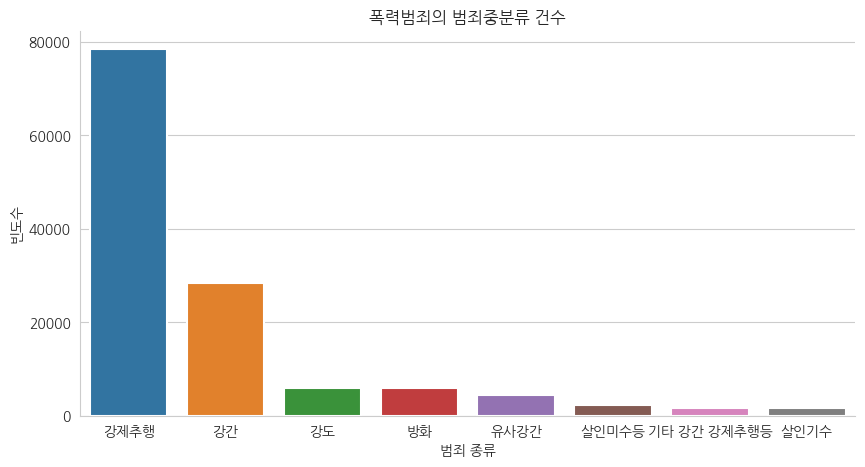

In [59]:
# 막대그래프 시각화
rc('font', family=font) # 한글깨짐현상 해결
plt.figure(figsize=(10, 5))
plt.title('폭력범죄의 범죄중분류 건수')

sns.set_style('white') # 그래프 스타일 지정(그리드 없는 스타일)
sns.despine() # 축/테두리 제거
sns.set_context("talk", font_scale=1) # 스케일 크기 조정

sns.barplot(data=df3, x='범죄중분류', y='합계')
plt.xlabel('범죄 종류')
plt.ylabel('빈도수')

plt.show()

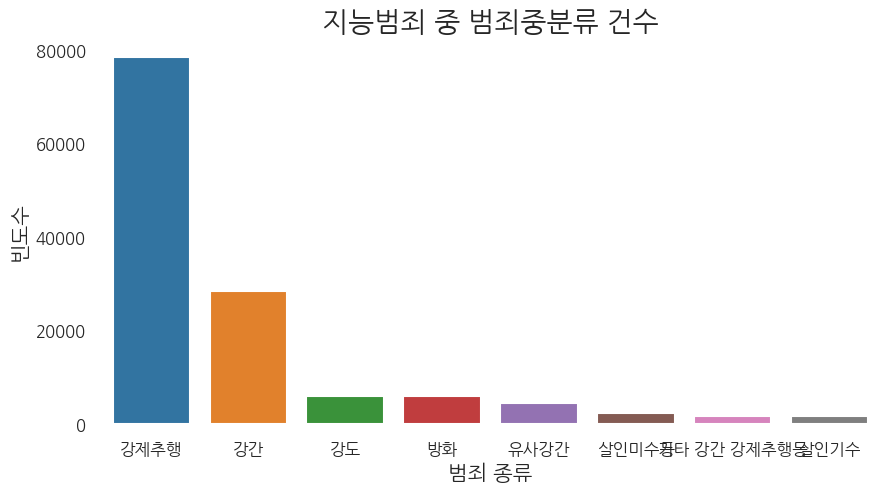

In [60]:
# 막대그래프 시각화
rc('font', family=font) # 한글깨짐현상 해결
plt.figure(figsize=(10, 5))
plt.title('지능범죄 중 범죄중분류 건수', fontsize = 20)

sns.set_style('whitegrid')
sns.despine(left=True, bottom=True)
sns.barplot(data=df3, x='범죄중분류', y='합계')

plt.xlabel('범죄 종류', fontsize=15)
plt.ylabel('빈도수', fontsize=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

In [61]:
# 혼인 합계, 미혼 합계 컬럼 생성
df1['혼인_합계'] = df1['혼인관계(유배우자)'] + df1['혼인관계(동거)'] + df1['혼인관계(이혼)'] + df1['혼인관계(사별)']

df1['미혼_합계'] = df1['미혼자부모관계(실(양)부모)'] + df1['미혼자부모관계(계부모)'] + df1['미혼자부모관계(실부계모)'] + df1['미혼자부모관계(실부무모)'] + df1['미혼자부모관계(실모계부)'] + df1['미혼자부모관계(실모무부)'] + df1['미혼자부모관계(계부무모)'] + df1['미혼자부모관계(계모무부)'] + df1['미혼자부모관계(무부모)']

df1.head()

,범죄대분류,범죄중분류,생활정도(계),생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(계),혼인관계(소계),혼인관계(유배우자),...,미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상,혼인_합계,미혼_합계
0,강력범죄,살인기수,341,172,72,6,91,341,158,81,...,2,8,0,17,0,0,20,91,158,92
1,강력범죄,살인미수등,454,276,93,3,82,454,234,123,...,0,10,1,19,0,1,24,82,234,138
2,강력범죄,강도,1202,713,327,15,147,1202,257,144,...,8,37,8,69,0,3,56,147,257,798
3,강력범죄,강간,6113,1831,1987,78,2217,6113,1295,798,...,23,143,19,270,0,2,139,2216,1295,2602
4,강력범죄,유사강간,934,331,362,7,234,934,236,145,...,4,21,3,55,0,1,29,232,236,466


In [62]:
df2 = df1[['범죄중분류', '혼인_합계', '미혼_합계']].set_index('범죄중분류')
df2.sort_values(by='혼인_합계', ascending = False, inplace = True)
df2

,혼인_합계,미혼_합계
범죄중분류,,
소계,140745,79967
소계,110901,57299
사기,65125,65200
폭행,62799,34999
소계,43426,44743
소계,30402,17188
상해,24499,14730
손괴,19447,11862
횡령,13463,7544


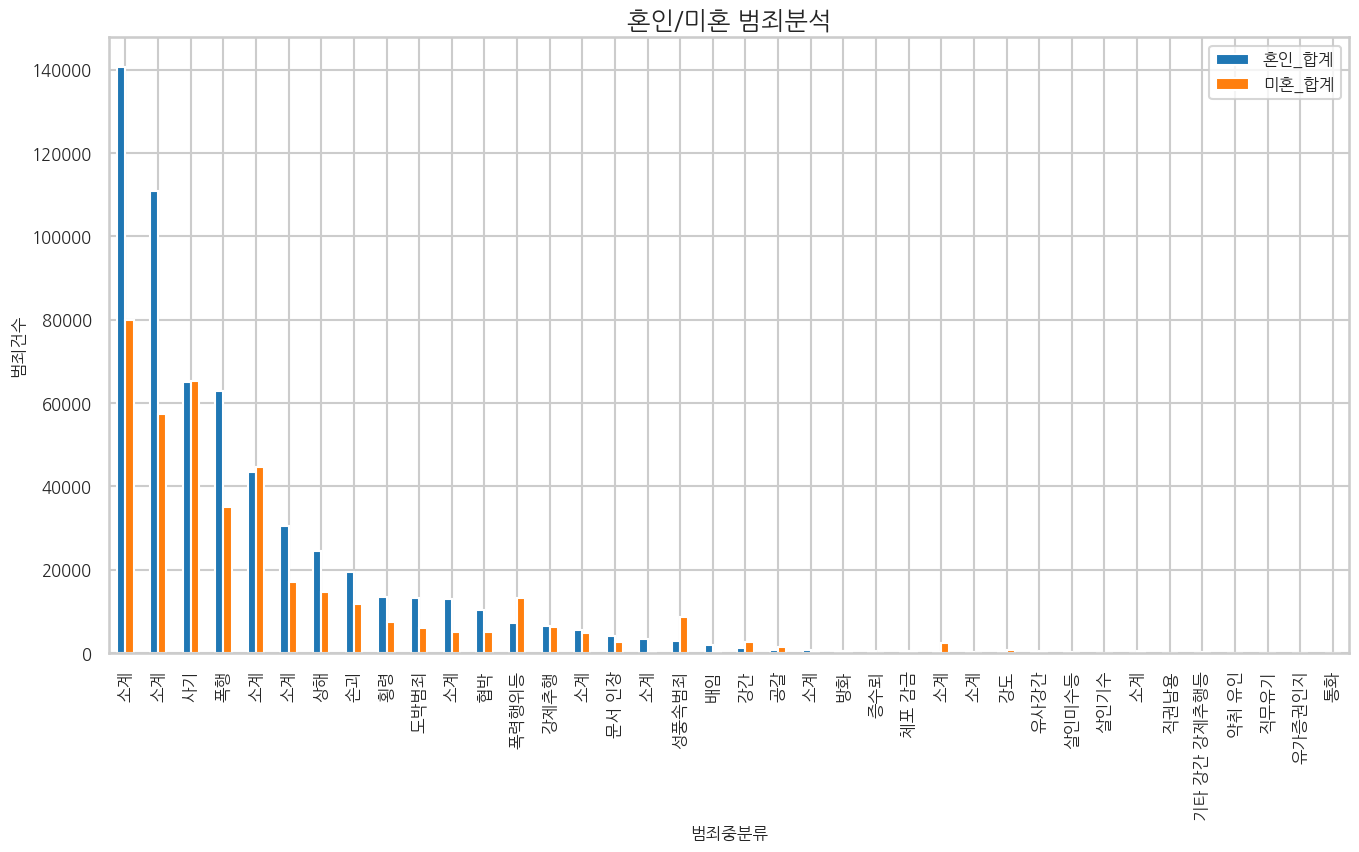

In [63]:
# 막대그래프 시각화
rc('font', family=font) # 한글깨짐현상 해결
ax = df2.sort_values(by='혼인_합계', ascending=False).plot(kind='bar', title='혼인/미혼 범죄분석', figsize=(16, 8), legend=True, fontsize=12) 

ax.set_xlabel('범죄중분류', fontsize=12) # x축 정보 표시 
ax.set_ylabel('범죄건수', fontsize=12) # y축 정보 표시 
ax.legend(['혼인_합계', '미혼_합계'], fontsize=12)

plt.show()
     

In [64]:
df1['생활정도_합'] = df1['생활정도(하류)'] + df1['생활정도(중류)'] + df1['생활정도(상류)'] 
df1.head()

,범죄대분류,범죄중분류,생활정도(계),생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(계),혼인관계(소계),혼인관계(유배우자),...,미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상,혼인_합계,미혼_합계,생활정도_합
0,강력범죄,살인기수,341,172,72,6,91,341,158,81,...,8,0,17,0,0,20,91,158,92,250
1,강력범죄,살인미수등,454,276,93,3,82,454,234,123,...,10,1,19,0,1,24,82,234,138,372
2,강력범죄,강도,1202,713,327,15,147,1202,257,144,...,37,8,69,0,3,56,147,257,798,1055
3,강력범죄,강간,6113,1831,1987,78,2217,6113,1295,798,...,143,19,270,0,2,139,2216,1295,2602,3896
4,강력범죄,유사강간,934,331,362,7,234,934,236,145,...,21,3,55,0,1,29,232,236,466,700


In [67]:
# 막대그래프 시각화
rc('font', family=font) # 한글깨짐현상 해결
ax = df2.sort_values(by='생활정도_합', ascending=False).plot(kind='bar', title='생활정도 범죄비', figsize=(16, 8), legend=True, fontsize=12) 

ax.set_xlabel('범죄중분류', fontsize=12) # x축 정보 표시 
ax.set_ylabel('범죄건수', fontsize=12) # y축 정보 표시 
ax.legend(['생활정도_합'], fontsize=12)

plt.show()

KeyError: '생활정도_합'